## Problem statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

train_path_dir = r"C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
test_path_dir= r"C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Test"

data_dir_train = pathlib.Path(train_path_dir)
data_dir_test = pathlib.Path(test_path_dir)

In [4]:
temp_path = "C:/Users/I324158/Downloads/Skin cancer ISIC The International Skin Imaging Collaboration/Train"

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset = "training"
    
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset = "validation")

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

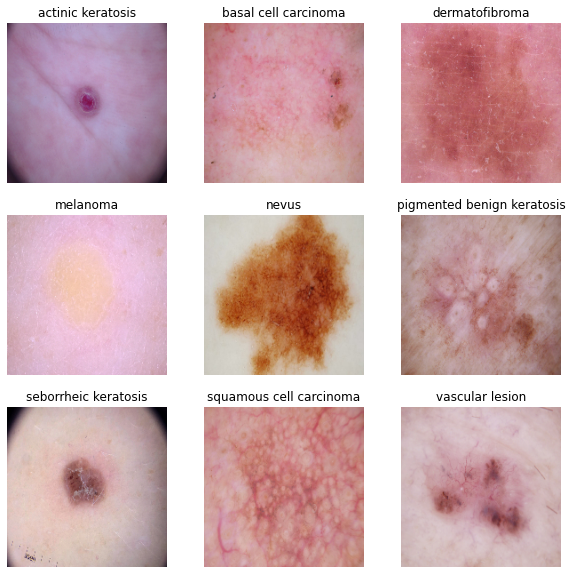

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype(np.uint8))

        plt.title(class_names[i])
        plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardize the data

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# print(np.min(first_image), np.max(first_image))

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
# model architecture
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds ,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 34s 606ms/step - loss: 2.0718 - accuracy: 0.1920 - val_loss: 1.9896 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 26s 473ms/step - loss: 1.9307 - accuracy: 0.2740 - val_loss: 1.8278 - val_accuracy: 0.3557
Epoch 3/20
56/56 [==============================] - 30s 533ms/step - loss: 1.6546 - accuracy: 0.4118 - val_loss: 1.6302 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 28s 504ms/step - loss: 1.4252 - accuracy: 0.4983 - val_loss: 1.4601 - val_accuracy: 0.5011
Epoch 5/20
56/56 [==============================] - 28s 505ms/step - loss: 1.3694 - accuracy: 0.5279 - val_loss: 1.4045 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 29s 509ms/step - loss: 1.2420 - accuracy: 0.5781 - val_loss: 1.5405 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 27s 486ms/step - loss: 1.1615 - accuracy: 0.5820 - val_loss: 1.4593 - val_accuracy: 0.5056

### Visualizing training results

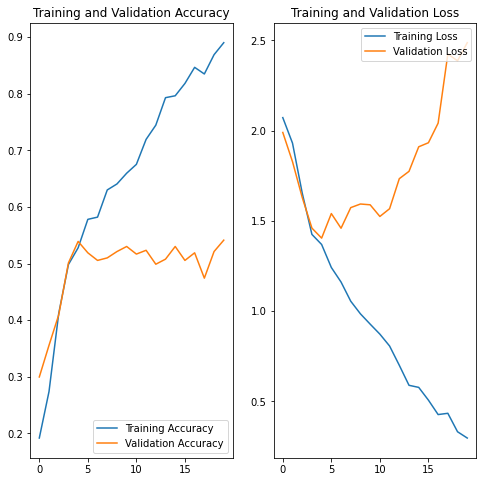

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Findings:
- The Training accuracy comes as 90.57 
- The validation accuracy comes as 53.24
- Hence it is a clear case of __overfitting__ where the model does not work well on validation data


## Data Augmentation 

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

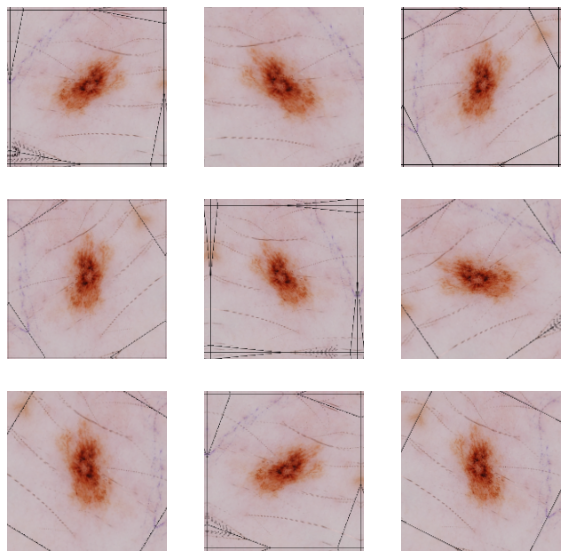

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off") 

## Dropout


### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [22]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 508ms/step - loss: 2.0284 - accuracy: 0.2628 - val_loss: 1.7138 - val_accuracy: 0.4049
Epoch 2/20
56/56 [==============================] - 28s 502ms/step - loss: 1.6943 - accuracy: 0.3862 - val_loss: 1.5619 - val_accuracy: 0.4430
Epoch 3/20
56/56 [==============================] - 28s 505ms/step - loss: 1.5960 - accuracy: 0.4258 - val_loss: 1.5023 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 28s 496ms/step - loss: 1.5310 - accuracy: 0.4609 - val_loss: 1.4824 - val_accuracy: 0.4743
Epoch 5/20
56/56 [==============================] - 28s 501ms/step - loss: 1.3928 - accuracy: 0.5201 - val_loss: 1.3941 - val_accuracy: 0.5123
Epoch 6/20
56/56 [==============================] - 29s 512ms/step - loss: 1.3512 - accuracy: 0.5179 - val_loss: 1.3818 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 28s 494ms/step - loss: 1.3288 - accuracy: 0.5273 - val_loss: 1.3640 - val_accuracy: 0.5391

### Visualizing the results

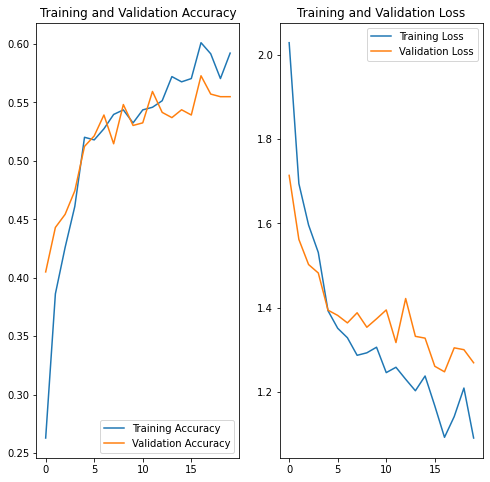

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

## Findings:

- The training accuracy comes around 59%
- The validation accuracy comes around 55%
- The training and validtion accuracy are closely aligned and we are in right direction of model building.
- We need to imporve the accuracy by adding more data(image)


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
## Your code goes here.

# for element in train_ds:
#     print(element[1].numpy().shape)
#     break

# for images, labels in train_ds.take():
#     temp = labels.numpy()

    
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
# #         plt.title(class_names[labels[i]])
#         plt.axis("off")

In [27]:
temp_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path_dir,
    labels="inferred",
    label_mode="categorical",
    batch_size=2239,
    image_size=(180, 180),
    shuffle=True,
    seed=123
    
    
)

Found 2239 files belonging to 9 classes.


In [28]:
for images, labels in temp_train_ds:
    temp = labels.numpy()

In [29]:
import pandas as pd

data = pd.DataFrame(temp,columns=class_names)

In [30]:
data

,actinic keratosis,basal cell carcinoma,dermatofibroma,melanoma,nevus,pigmented benign keratosis,seborrheic keratosis,squamous cell carcinoma,vascular lesion
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2234,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2235,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
for col in data.columns:
    print(f"{col}\n", data[col].value_counts(ascending=True))
    print('---------------------------------------')

actinic keratosis
 1.0     114
0.0    2125
Name: actinic keratosis, dtype: int64
---------------------------------------
basal cell carcinoma
 1.0     376
0.0    1863
Name: basal cell carcinoma, dtype: int64
---------------------------------------
dermatofibroma
 1.0      95
0.0    2144
Name: dermatofibroma, dtype: int64
---------------------------------------
melanoma
 1.0     438
0.0    1801
Name: melanoma, dtype: int64
---------------------------------------
nevus
 1.0     357
0.0    1882
Name: nevus, dtype: int64
---------------------------------------
pigmented benign keratosis
 1.0     462
0.0    1777
Name: pigmented benign keratosis, dtype: int64
---------------------------------------
seborrheic keratosis
 1.0      77
0.0    2162
Name: seborrheic keratosis, dtype: int64
---------------------------------------
squamous cell carcinoma
 1.0     181
0.0    2058
Name: squamous cell carcinoma, dtype: int64
---------------------------------------
vascular lesion
 1.0     139
0.0    21

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
    - From above, we can see seborrheic keratosis has list no of samples i:e 77
#### - Which classes dominate the data in terms proportionate number of samples?
    - pigmented benign keratosis has more no of samples in the training set i:e 462

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [32]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [34]:
path_to_training_dataset=train_path_dir
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset+'/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20A193AB4C8>: 100%|█| 500/500 [00:04<00:00, 112.67 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20A13706548>: 100%|█| 500/500 [00:04<00:00, 100.31 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20A141F6CC8>: 100%|█| 500/500 [00:05<00:
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2592x1944 at 0x20A192A6A48>: 100%|█| 500/500 [00:25<0
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x20A193833C8>: 100%|█| 500/500 [00:23<00:00, 21.53 Sample
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20A193ABDC8>: 100%|█| 500/500 [00:04<00:00, 102.72 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20A13B55AC8>: 100%|█| 500/500 [00:11<00:00, 44.92 Samples
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20A1944E3C8>: 100%|█| 500/500 [00:05<00:00, 99.94 Samples/
Executing Pipeline:   0%|                                                                | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to C:\Users\I324158\Downloads\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20A13901D88>: 100%|█| 500/500 [00:05<00:


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [36]:
path_list_old = [x for x in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [37]:
path_list_old[115:119]

['C:\\Users\\I324158\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\ISIC_0024515.jpg',
 'C:\\Users\\I324158\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\ISIC_0024550.jpg',
 'C:\\Users\\I324158\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\ISIC_0024564.jpg',
 'C:\\Users\\I324158\\Downloads\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\basal cell carcinoma\\ISIC_0024572.jpg']

In [38]:
len(path_list_old)

2239

In [39]:
lesion_list_old = [os.path.basename(os.path.dirname(y)) \
                   for y in glob.glob(os.path.join(data_dir_train,'*','*.jpg'))]

In [40]:
lesion_list_old[1:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [41]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])


In [42]:
original_df["Label"].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Lets see the distribution of augmented data after adding new images to the original training data.

In [43]:
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [44]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[1:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [45]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
# dataframe_dict_new

In [46]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [47]:
# new_df['Label'].value_counts()
new_df["Label"].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [48]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [49]:
data_dir_train= train_path_dir #"path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [50]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [51]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)       

#### **Todo:**  Train your model

In [54]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 109s 643ms/step - loss: 1.9208 - accuracy: 0.2602 - val_loss: 1.6750 - val_accuracy: 0.3022
Epoch 2/50
169/169 [==============================] - 108s 639ms/step - loss: 1.5373 - accuracy: 0.4230 - val_loss: 1.3591 - val_accuracy: 0.4885
Epoch 3/50
169/169 [==============================] - 101s 595ms/step - loss: 1.2901 - accuracy: 0.5193 - val_loss: 1.3298 - val_accuracy: 0.4915
Epoch 4/50
169/169 [==============================] - 103s 609ms/step - loss: 1.1495 - accuracy: 0.5796 - val_loss: 1.0926 - val_accuracy: 0.5798
Epoch 5/50
169/169 [==============================] - 98s 580ms/step - loss: 0.9379 - accuracy: 0.6575 - val_loss: 1.1032 - val_accuracy: 0.6050
Epoch 6/50
169/169 [==============================] - 98s 581ms/step - loss: 0.7786 - accuracy: 0.7222 - val_loss: 0.9626 - val_accuracy: 0.6585
Epoch 7/50
169/169 [==============================] - 99s 583ms/step - loss: 0.6031 - accuracy: 0.7928 - val_loss: 0.8987 - va

#### **Todo:**  Visualize the model results

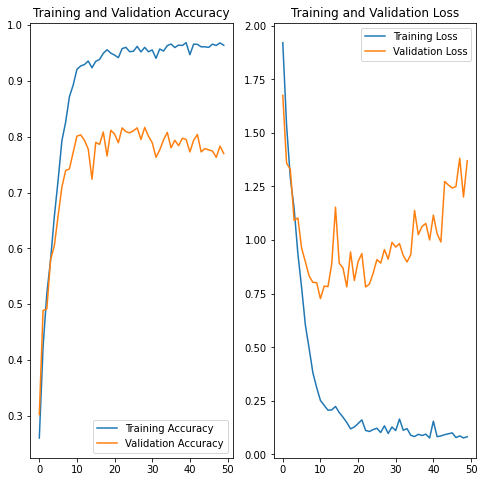

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- The training accuracy move to 96%.
- The validation accuracy jumped to 77%.
- Still some element of overfitting is there .
- Class rebalance by Augmentation certainly helped, but still we have very less no of ttraining example for custom CNN.
- We can add more images  to improve training process.